In [7]:
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
import datetime as dt


In [13]:
data = pd.read_excel('/content/online_retail_II.xlsx')


In [14]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


**Data Cleaning**

In [20]:
data.dropna(inplace=True)
data = data[data['Quantity'] > 0]
data = data[data['Price'] > 0]


**Create Total Price Column**


In [21]:
data['Price'] = data['Quantity'] * data['Price']


**Convert Date Column to datetime**

In [25]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])


**Calculate RFM Values**

Choose a snapshot date (last date in data + 1 day)





In [28]:
snapshot_date = data['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = data.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'Invoice': 'nunique',
    'Price': 'sum'
}).reset_index()

rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']


**RFM Scoring (1 to 5)**

In [29]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])


**Combine Scores into Segment**

In [30]:
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].astype(int).sum(axis=1)


**Define Segments **

In [31]:
def rfm_level(score):
    if score >= 9:
        return 'Top Customers'
    elif score >= 7:
        return 'Loyal'
    elif score >= 5:
        return 'Potential'
    else:
        return 'At Risk'

rfm['Segment'] = rfm['RFM_Score'].apply(rfm_level)


**Visualize Segments**

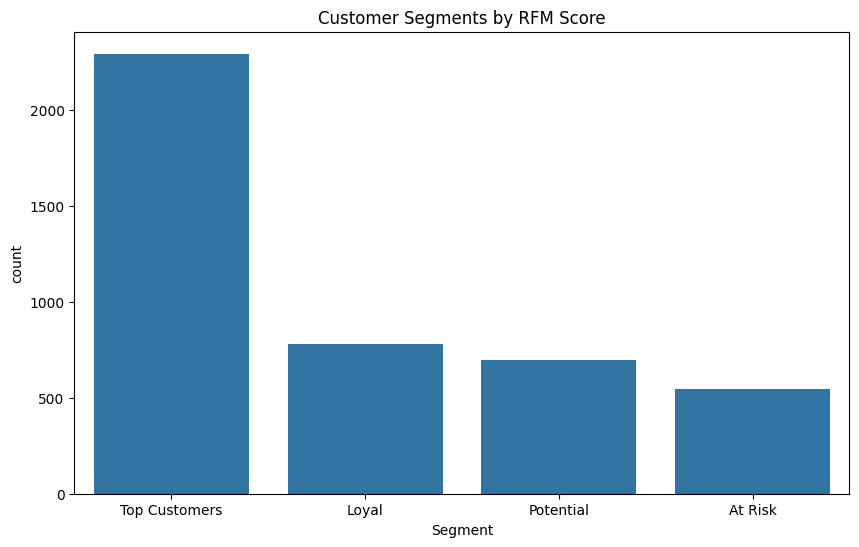

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index)
plt.title("Customer Segments by RFM Score")
plt.show()


In [33]:
rfm.to_csv("rfm_table.csv", index=False)


Conclusion:

 Customer Segmentation Using RFM Analysis
Through this project, we successfully applied RFM (Recency, Frequency, Monetary) analysis to segment customers based on their purchasing behavior. By analyzing the Recency (how recently a customer purchased), Frequency (how often they purchase), and Monetary (how much they spend) values, we grouped customers into meaningful clusters such as:

🟢 Top Customers (high recency, frequency, and monetary)

🟡 Loyal Customers

🔵 At-risk Customers

🔴 Lost Customers

These insights are extremely valuable for:

🔁 Targeted marketing strategies

📈 Increasing customer retention

💡 Personalized offers and loyalty programs

💰 Boosting overall revenue

This project sharpened my skills in:

Customer analytics

Data preprocessing & visualization

Business intelligence

Strategic thinking based on data storytelling

✅ This kind of analysis is highly applicable in e-commerce, retail, CRM systems, and digital marketing.












